<a href="https://colab.research.google.com/github/Akashprabhu1/Soccer-player-performance-prediction-/blob/main/soccer-player-perf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_csv('/kaggle/input/football-striker-performance/StrikerPerformance.csv')
data

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,17/18 goals,17/18 minutes,age,current club,current league,foot,height,name,nationality,position
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,3.0,1194.0,26,Zenit St. Petersburg,Premier Liga,right,183.0,Dmitri Poloz,Russia,W
1,NaN,NaN,NaN,NaN,0.0,26.0,1.0,1255.0,6.0,48.0,...,6.0,1433.0,25,Zenit St. Petersburg,Premier Liga,both,180.0,Emiliano Rigoni,Argentina Italy,W
2,NaN,NaN,NaN,NaN,0.0,7.0,1.0,296.0,4.0,37.0,...,3.0,1571.0,22,Zenit St. Petersburg,Premier Liga,both,179.0,Sebastián Driussi,Argentina Italy,CF
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,19.0,2911.0,26,Zenit St. Petersburg,Premier Liga,right,183.0,Aleksandr Kokorin,Russia,CF
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,NaN,NaN,...,4.0,2019.0,26,Zenit St. Petersburg,Premier Liga,right,188.0,Anton Zabolotnyi,Russia,CF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,748.0,24,Desportivo Aves,Liga NOS,right,175.0,Hamdou Elhouni,Libya,W
1173,NaN,NaN,NaN,NaN,7.0,34.0,19.0,3027.0,7.0,27.0,...,3.0,1366.0,30,Desportivo Aves,Liga NOS,right,183.0,Derley,Brazil,CF
1174,0.0,2.0,1.0,115.0,0.0,6.0,0.0,419.0,3.0,19.0,...,3.0,885.0,23,Desportivo Aves,Liga NOS,right,178.0,Cristian Arango,Colombia,CF
1175,0.0,1.0,0.0,0.0,0.0,17.0,0.0,706.0,0.0,13.0,...,2.0,857.0,24,Desportivo Aves,Liga NOS,right,185.0,Alexandre Guedes,Portugal,CF


In [ ]:
columns_to_drop = [24, 25, 26, 27, 28, 30, 31]  # Index of columns to drop
data_filtered = data.drop(data.columns[columns_to_drop], axis=1)

# Display the new dataframe
print(data_filtered.head())

   12/13 assists  12/13 games  12/13 goals  12/13 minutes  13/14 assists  \
0            1.0         22.0          3.0         1057.0            4.0   
1            NaN          NaN          NaN            NaN            0.0   
2            NaN          NaN          NaN            NaN            0.0   
3            5.0         26.0         13.0         2287.0            9.0   
4            0.0          5.0          1.0          171.0            1.0   

   13/14 games  13/14 goals  13/14 minutes  14/15 assists  14/15 games  ...  \
0         30.0          1.0         1258.0            2.0         24.0  ...   
1         26.0          1.0         1255.0            6.0         48.0  ...   
2          7.0          1.0          296.0            4.0         37.0  ...   
3         23.0         10.0         1777.0            7.0         39.0  ...   
4         26.0          3.0         1305.0            NaN          NaN  ...   

   15/16 minutes  16/17 assists  16/17 games  16/17 goals  16/17 min

In [ ]:
data_filled = data_filtered.fillna(0)
data_filled

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,15/16 minutes,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes,name
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,2132.0,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0,Dmitri Poloz
1,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1255.0,6.0,48.0,...,1533.0,2.0,31.0,11.0,2427.0,3.0,21.0,6.0,1433.0,Emiliano Rigoni
2,0.0,0.0,0.0,0.0,0.0,7.0,1.0,296.0,4.0,37.0,...,914.0,3.0,35.0,21.0,2517.0,4.0,31.0,3.0,1571.0,Sebastián Driussi
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,1424.0,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0,Aleksandr Kokorin
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,0.0,0.0,...,1500.0,5.0,34.0,16.0,2562.0,2.0,24.0,4.0,2019.0,Anton Zabolotnyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,954.0,1.0,15.0,1.0,663.0,0.0,19.0,1.0,748.0,Hamdou Elhouni
1173,0.0,0.0,0.0,0.0,7.0,34.0,19.0,3027.0,7.0,27.0,...,1580.0,0.0,18.0,3.0,948.0,4.0,21.0,3.0,1366.0,Derley
1174,0.0,2.0,1.0,115.0,0.0,6.0,0.0,419.0,3.0,19.0,...,1400.0,0.0,1.0,0.0,5.0,2.0,19.0,3.0,885.0,Cristian Arango
1175,0.0,1.0,0.0,0.0,0.0,17.0,0.0,706.0,0.0,13.0,...,2941.0,6.0,39.0,13.0,2747.0,1.0,14.0,2.0,857.0,Alexandre Guedes


In [ ]:
data_filled['average_performance'] = (data_filled.filter(like='assists').sum(axis=1) +
                                       data_filled.filter(like='goals').sum(axis=1)) / 5
data_filled

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes,name,average_performance
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0,Dmitri Poloz,12.0
1,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1255.0,6.0,48.0,...,2.0,31.0,11.0,2427.0,3.0,21.0,6.0,1433.0,Emiliano Rigoni,9.4
2,0.0,0.0,0.0,0.0,0.0,7.0,1.0,296.0,4.0,37.0,...,3.0,35.0,21.0,2517.0,4.0,31.0,3.0,1571.0,Sebastián Driussi,8.4
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0,Aleksandr Kokorin,21.0
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,0.0,0.0,...,5.0,34.0,16.0,2562.0,2.0,24.0,4.0,2019.0,Anton Zabolotnyi,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,15.0,1.0,663.0,0.0,19.0,1.0,748.0,Hamdou Elhouni,1.2
1173,0.0,0.0,0.0,0.0,7.0,34.0,19.0,3027.0,7.0,27.0,...,0.0,18.0,3.0,948.0,4.0,21.0,3.0,1366.0,Derley,10.2
1174,0.0,2.0,1.0,115.0,0.0,6.0,0.0,419.0,3.0,19.0,...,0.0,1.0,0.0,5.0,2.0,19.0,3.0,885.0,Cristian Arango,4.0
1175,0.0,1.0,0.0,0.0,0.0,17.0,0.0,706.0,0.0,13.0,...,6.0,39.0,13.0,2747.0,1.0,14.0,2.0,857.0,Alexandre Guedes,8.2


In [ ]:
data_rem = data_filled.drop(columns=['name'])
data_rem

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,15/16 minutes,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes,average_performance
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,2132.0,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0,12.0
1,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1255.0,6.0,48.0,...,1533.0,2.0,31.0,11.0,2427.0,3.0,21.0,6.0,1433.0,9.4
2,0.0,0.0,0.0,0.0,0.0,7.0,1.0,296.0,4.0,37.0,...,914.0,3.0,35.0,21.0,2517.0,4.0,31.0,3.0,1571.0,8.4
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,1424.0,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0,21.0
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,0.0,0.0,...,1500.0,5.0,34.0,16.0,2562.0,2.0,24.0,4.0,2019.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,954.0,1.0,15.0,1.0,663.0,0.0,19.0,1.0,748.0,1.2
1173,0.0,0.0,0.0,0.0,7.0,34.0,19.0,3027.0,7.0,27.0,...,1580.0,0.0,18.0,3.0,948.0,4.0,21.0,3.0,1366.0,10.2
1174,0.0,2.0,1.0,115.0,0.0,6.0,0.0,419.0,3.0,19.0,...,1400.0,0.0,1.0,0.0,5.0,2.0,19.0,3.0,885.0,4.0
1175,0.0,1.0,0.0,0.0,0.0,17.0,0.0,706.0,0.0,13.0,...,2941.0,6.0,39.0,13.0,2747.0,1.0,14.0,2.0,857.0,8.2


In [ ]:
X = data_rem.drop(columns=['average_performance'])
y = data_rem['average_performance']


In [ ]:
X

,12/13 assists,12/13 games,12/13 goals,12/13 minutes,13/14 assists,13/14 games,13/14 goals,13/14 minutes,14/15 assists,14/15 games,...,15/16 goals,15/16 minutes,16/17 assists,16/17 games,16/17 goals,16/17 minutes,17/18 assists,17/18 games,17/18 goals,17/18 minutes
0,1.0,22.0,3.0,1057.0,4.0,30.0,1.0,1258.0,2.0,24.0,...,7.0,2132.0,8.0,40.0,14.0,2987.0,7.0,24.0,3.0,1194.0
1,0.0,0.0,0.0,0.0,0.0,26.0,1.0,1255.0,6.0,48.0,...,5.0,1533.0,2.0,31.0,11.0,2427.0,3.0,21.0,6.0,1433.0
2,0.0,0.0,0.0,0.0,0.0,7.0,1.0,296.0,4.0,37.0,...,1.0,914.0,3.0,35.0,21.0,2517.0,4.0,31.0,3.0,1571.0
3,5.0,26.0,13.0,2287.0,9.0,23.0,10.0,1777.0,7.0,39.0,...,8.0,1424.0,7.0,38.0,10.0,2889.0,4.0,34.0,19.0,2911.0
4,0.0,5.0,1.0,171.0,1.0,26.0,3.0,1305.0,0.0,0.0,...,5.0,1500.0,5.0,34.0,16.0,2562.0,2.0,24.0,4.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,954.0,1.0,15.0,1.0,663.0,0.0,19.0,1.0,748.0
1173,0.0,0.0,0.0,0.0,7.0,34.0,19.0,3027.0,7.0,27.0,...,5.0,1580.0,0.0,18.0,3.0,948.0,4.0,21.0,3.0,1366.0
1174,0.0,2.0,1.0,115.0,0.0,6.0,0.0,419.0,3.0,19.0,...,9.0,1400.0,0.0,1.0,0.0,5.0,2.0,19.0,3.0,885.0
1175,0.0,1.0,0.0,0.0,0.0,17.0,0.0,706.0,0.0,13.0,...,14.0,2941.0,6.0,39.0,13.0,2747.0,1.0,14.0,2.0,857.0


In [ ]:
y

0       12.0
1        9.4
2        8.4
3       21.0
4        8.0
        ... 
1172     1.2
1173    10.2
1174     4.0
1175     8.2
1176     8.2
Name: average_performance, Length: 1177, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.2503728813559323


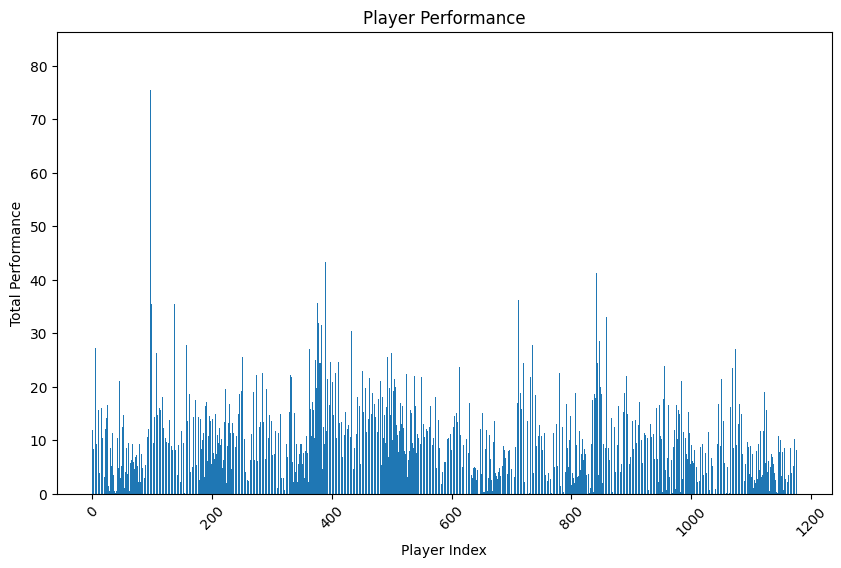

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(data_filled.index, data_filled['average_performance'])
plt.xlabel('Player Index')
plt.ylabel('Total Performance')
plt.title('Player Performance')
plt.xticks(rotation=45)
plt.show()

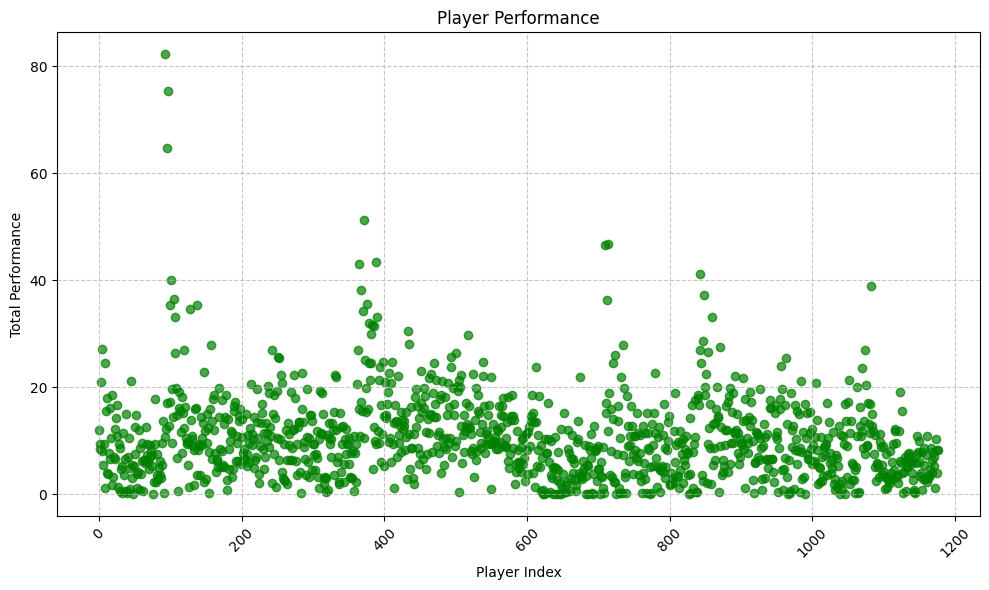

In [ ]:

# Customize the appearance of the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.scatter(data_filled.index, data_filled['average_performance'], color='green', marker='o', alpha=0.7)  # Customize marker and color
plt.xlabel('Player Index')
plt.ylabel('Total Performance')
plt.title('Player Performance')
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping labels

plt.show()


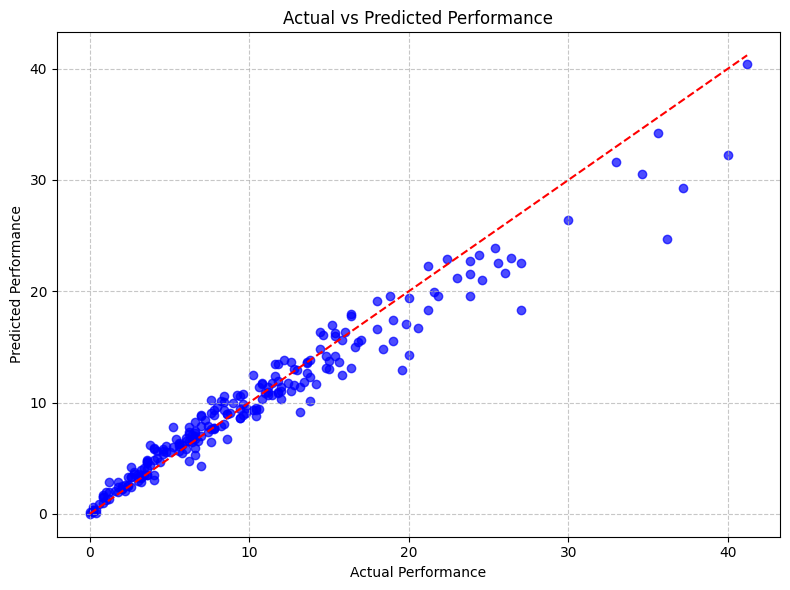

In [ ]:

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Add a diagonal line for reference
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Actual vs Predicted Performance')
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()

plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 1.2503728813559323
Mean Squared Error: 3.754802915254239
R-squared: 0.9422602660396424


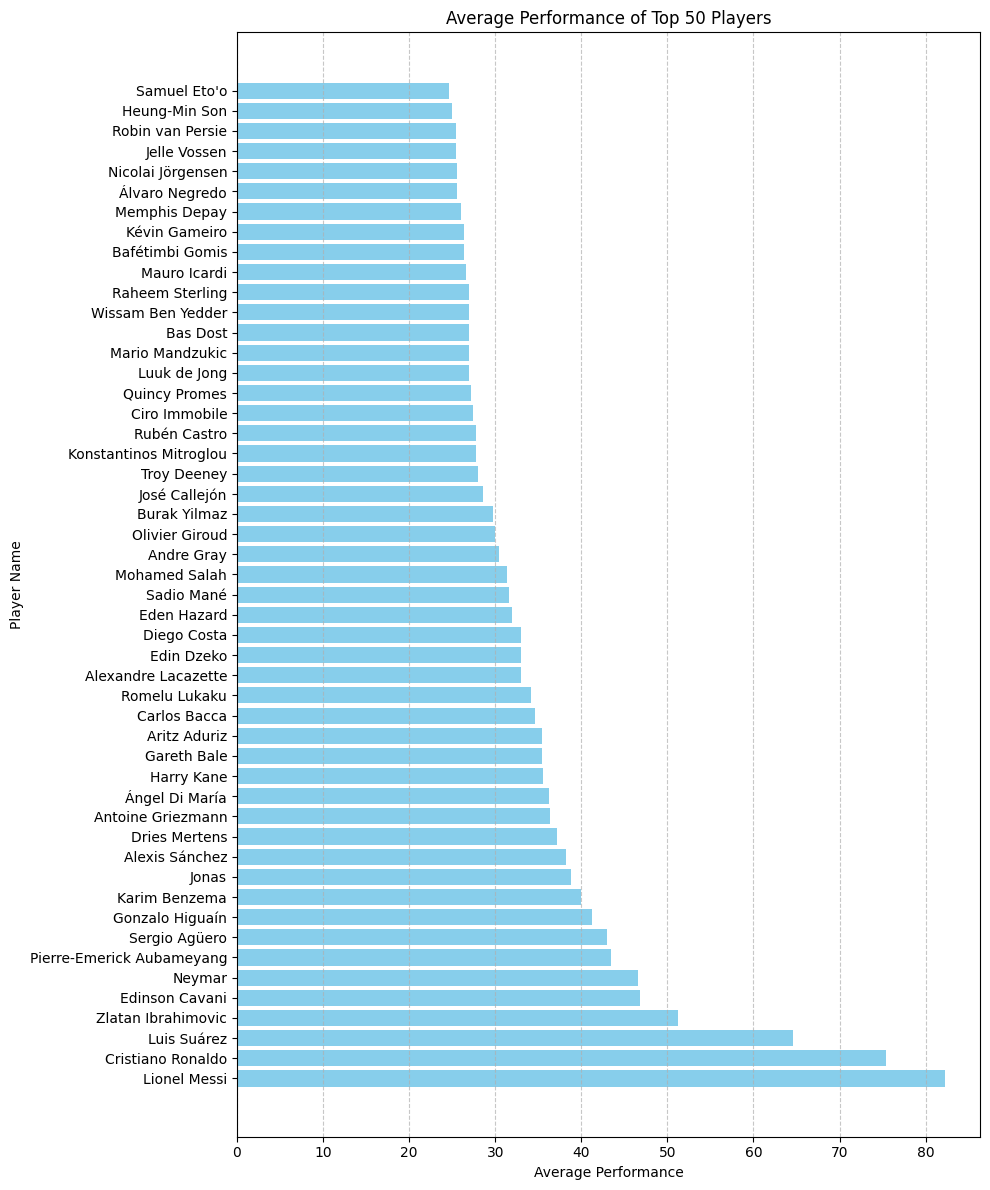

In [ ]:
import matplotlib.pyplot as plt

# Set the font family to one that supports a wider range of characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# Sort players by average performance
sorted_data = data_filled.sort_values(by='average_performance', ascending=False)

# Select the top 50 players
top_players = sorted_data.head(50)

# Create a horizontal bar plot for the top 50 players
plt.figure(figsize=(10, 12))
plt.barh(top_players['name'], top_players['average_performance'], color='skyblue')
plt.xlabel('Average Performance')
plt.ylabel('Player Name')
plt.title('Average Performance of Top 50 Players')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
